In [28]:
import pandas as pd

df = pd.read_csv('/Users/peiyuanlee/Downloads/Motility_final.csv')
df.head()

,Patient_ID,Age,Sex,Laterality,Restriction,Global_Motility,Upgaze,Downgaze,ADduction,ABduction,...,CSA_SR,CSA_IR,CSA_MR,CSA_LR,SR_size,IR_size,MR_size,LR_size,sum_fracture,muscle_bi
0,KL_1,35,0,OS,0,NaN,45,45.0,45.0,45.0,...,-4.347826,14.285714,5.882353,8.333333,normal,normal,normal,normal,1,0
1,KL_2,75,0,OS,0,NaN,45,45.0,45.0,45.0,...,11.111111,8.000000,7.692308,-8.695652,normal,normal,normal,normal,1,0
2,KL_3,41,0,OD,0,NaN,45,45.0,45.0,45.0,...,-18.604651,-20.689655,58.333333,25.925926,normal,normal,normal,normal,1,0
3,KL_4,28,0,OS,1,NaN,35,45.0,45.0,45.0,...,-22.222222,127.272727,33.333333,72.727273,normal,large,normal,large,2,1
4,KL_5,22,0,OD,0,NaN,45,45.0,45.0,45.0,...,7.142857,-21.739130,-10.000000,4.347826,normal,normal,normal,normal,2,0


In [29]:
df['Restriction'].value_counts()
# relatively equal number of people with motility

Restriction
0    64
1    59
Name: count, dtype: int64

In [30]:
df['Global_Motility'] = [0 if pd.isna(i) else 1 for i in df['Global_Motility'] ]

In [31]:
# turn laterality to binary feature
# 1 is right 0 is left

df['Laterality'] = df['Laterality'].map({'OD': 1, 'OS': 0})

# turn muscle size to binary features
# 1 is large 0 is normal

muscle_size = ['SR_size', 'IR_size', 'MR_size', 'LR_size']
for i in muscle_size:
    df[i] = df[i].map({'normal': 0, 'large': 1})


# drop patient id since not useful
df.drop(columns=['Patient_ID'], inplace=True)


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 46 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     123 non-null    int64  
 1   Sex                     123 non-null    int64  
 2   Laterality              123 non-null    int64  
 3   Restriction             123 non-null    int64  
 4   Global_Motility         123 non-null    int64  
 5   Upgaze                  123 non-null    int64  
 6   Downgaze                122 non-null    float64
 7   ADduction               122 non-null    float64
 8   ABduction               122 non-null    float64
 9   Floor                   123 non-null    int64  
 10  Roof                    123 non-null    int64  
 11  Lateral                 123 non-null    int64  
 12  Medial                  123 non-null    int64  
 13  Retrobulbar_hemorrhage  88 non-null     float64
 14  Emphysema               121 non-null    fl

In [33]:
df['abs_IR'] = df['fIR'] - df['cIR']
df['abs_MR'] = df['fMR'] - df['cMR']
df['abs_LR'] = df['fLR'] - df['cLR']
df['abs_SR'] = df['fSR'] - df['cSR']

In [34]:
df_en = df[(df['abs_IR'] > 0) | (df['abs_MR'] > 0) | (df['abs_SR'] > 0) | (df['abs_LR'] > 0)]
df_en.head()

,Age,Sex,Laterality,Restriction,Global_Motility,Upgaze,Downgaze,ADduction,ABduction,Floor,...,SR_size,IR_size,MR_size,LR_size,sum_fracture,muscle_bi,abs_IR,abs_MR,abs_LR,abs_SR
0,35,0,0,0,0,45,45.0,45.0,45.0,1,...,0.0,0.0,0.0,0.0,1,0,0.02,0.01,0.02,-0.01
1,75,0,0,0,0,45,45.0,45.0,45.0,1,...,0.0,0.0,0.0,0.0,1,0,0.02,0.02,-0.02,0.04
2,41,0,1,0,0,45,45.0,45.0,45.0,1,...,0.0,0.0,0.0,0.0,1,0,-0.06,0.14,0.07,-0.08
3,28,0,0,1,0,35,45.0,45.0,45.0,1,...,0.0,1.0,0.0,1.0,2,1,0.28,0.07,0.16,-0.06
4,22,0,1,0,0,45,45.0,45.0,45.0,0,...,0.0,0.0,0.0,0.0,2,0,-0.05,-0.02,0.01,0.02


/Users/peiyuanlee/miniforge3/envs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/peiyuanlee/miniforge3/envs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/peiyuanlee/miniforge3/envs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/peiyuanlee/miniforge3/envs/myenv/lib/python3.11/site-packages/seaborn/

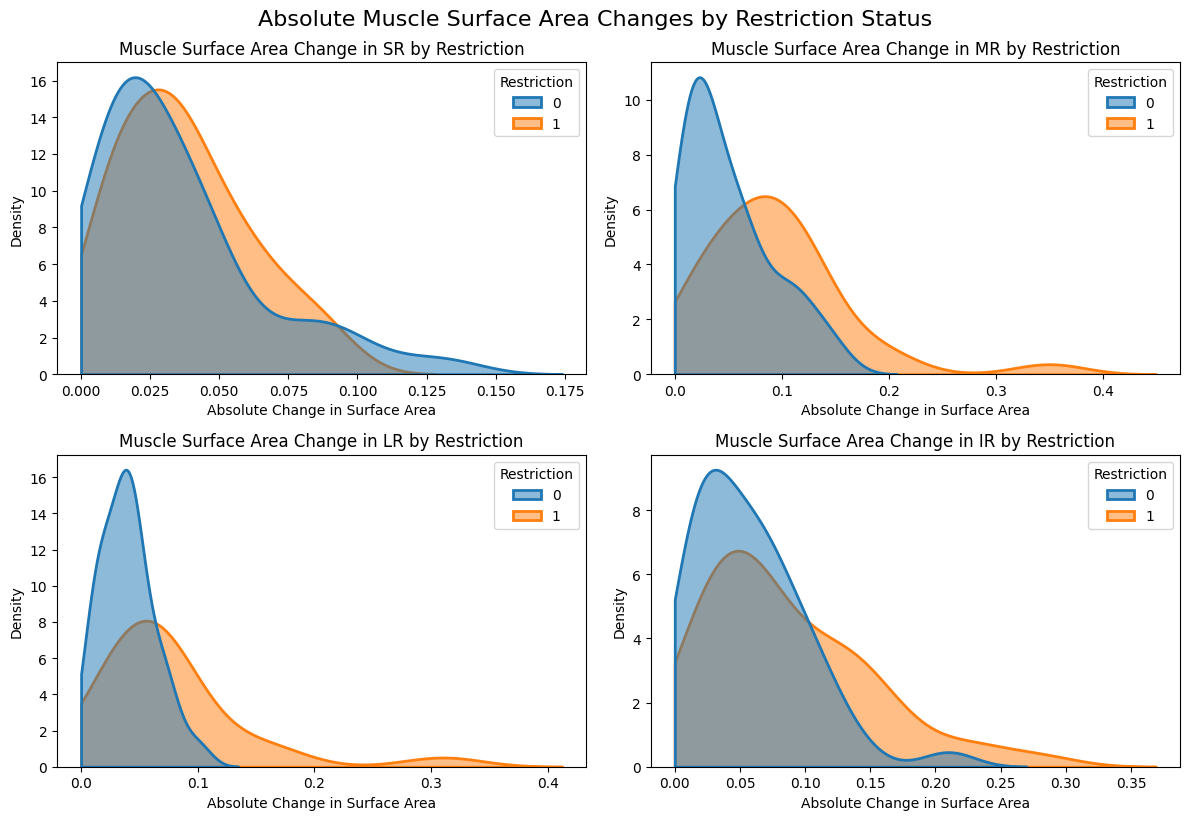

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define muscle names for looping
muscles = ['abs_SR', 'abs_MR', 'abs_LR', 'abs_IR']

# Create a 2x2 grid of KDE plots
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=False)

for ax, muscle in zip(axes.flatten(), muscles):
    data = df_en[df_en[muscle] > 0]
    sns.kdeplot(data=data, x=muscle, hue='Restriction', fill=True,
                common_norm=False, alpha=0.5, linewidth=2, ax=ax, clip= (0, np.max(data)))
    ax.set_title(f'Muscle Surface Area Change in {muscle.split("_")[1]} by Restriction')
    ax.set_xlabel('Absolute Change in Surface Area')
    ax.set_ylabel('Density')

# Improve spacing
plt.tight_layout()
plt.suptitle('Absolute Muscle Surface Area Changes by Restriction Status', fontsize=16, y=1.02)
plt.show()


In [77]:
alpha = 0.05/20

In [37]:
import numpy as np
from scipy.stats import shapiro

muscle = ['abs_SR', 'abs_MR', 'abs_LR', 'abs_IR']

for i in muscle:
    shapiro_test_restrict = shapiro(df_en[(df_en['Restriction'] == 1) & (df_en[i] > 0)][i])
    shapiro_test = shapiro(df_en[(df_en['Restriction'] == 0) & (df_en[i] > 0)][i])

    print(f'Shapiro-Wilk Test for {i}')
    if shapiro_test.pvalue < alpha or shapiro_test_restrict.pvalue <alpha:
        print(f'p-value for Non-Restricted Group: {shapiro_test.pvalue}')
        print(f'p-value for Restricted Group: {shapiro_test_restrict.pvalue}')
        print(f'Reject the null hypothesis. The distribution of {i} is not normal.')
    else:
        print(f'Fail to reject the null hypothesis. The distribution of {i} is normal.')

    print('\n')

Shapiro-Wilk Test for abs_SR
p-value for Non-Restricted Group: 2.2280246412265114e-05
p-value for Restricted Group: 0.06748681515455246
Reject the null hypothesis. The distribution of abs_SR is not normal.


Shapiro-Wilk Test for abs_MR
p-value for Non-Restricted Group: 0.00017034594202414155
p-value for Restricted Group: 0.0003874454996548593
Reject the null hypothesis. The distribution of abs_MR is not normal.


Shapiro-Wilk Test for abs_LR
p-value for Non-Restricted Group: 0.05106349661946297
p-value for Restricted Group: 5.555366078624502e-05
Reject the null hypothesis. The distribution of abs_LR is not normal.


Shapiro-Wilk Test for abs_IR
p-value for Non-Restricted Group: 0.0005672596162185073
p-value for Restricted Group: 0.0012440475402399898
Reject the null hypothesis. The distribution of abs_IR is not normal.




In [67]:
from scipy.stats import mannwhitneyu

muscle = ['abs_SR', 'abs_MR', 'abs_LR', 'abs_IR']

for i in muscle:
    restricted = df_en[(df_en['Restriction'] == 1) & (df_en[i] > 0)][i]
    unrestricted = df_en[(df_en['Restriction'] == 0) & (df_en[i] > 0)][i]
    test = mannwhitneyu(restricted, unrestricted, alternative='two-sided')

    print(f'Mann Whitney-U Test for {i}')
    if test.pvalue < alpha:
        print(f'p-value: {test.pvalue}')
        print(f'Reject the null hypothesis.')
        print('There is a significant difference between the percentage change in muscle surface area \nbetween patients with motility restriction and patients without motility restriction.')
        print('\n')
    else:
        print(f'p-value: {test.pvalue}')
        print(f'Fail to reject the null hypothesis.')
        print('There is no significant difference between the percentage change in muscle surface area \nbetween patients with motility restriction and patients without motility restriction.')
        print('\n')


Mann Whitney-U Test for abs_SR
p-value: 0.4633544515848277
Fail to reject the null hypothesis.
There is no significant difference between the percentage change in muscle surface area 
between patients with motility restriction and patients without motility restriction.


Mann Whitney-U Test for abs_MR
p-value: 0.0008646921960961505
Reject the null hypothesis.
There is a significant difference between the percentage change in muscle surface area 
between patients with motility restriction and patients without motility restriction.


Mann Whitney-U Test for abs_LR
p-value: 0.005176195016496183
Fail to reject the null hypothesis.
There is no significant difference between the percentage change in muscle surface area 
between patients with motility restriction and patients without motility restriction.


Mann Whitney-U Test for abs_IR
p-value: 0.03049057887349152
Fail to reject the null hypothesis.
There is no significant difference between the percentage change in muscle surface area 
bet

/Users/peiyuanlee/miniforge3/envs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/peiyuanlee/miniforge3/envs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/peiyuanlee/miniforge3/envs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/peiyuanlee/miniforge3/envs/myenv/lib/python3.11/site-packages/seaborn/

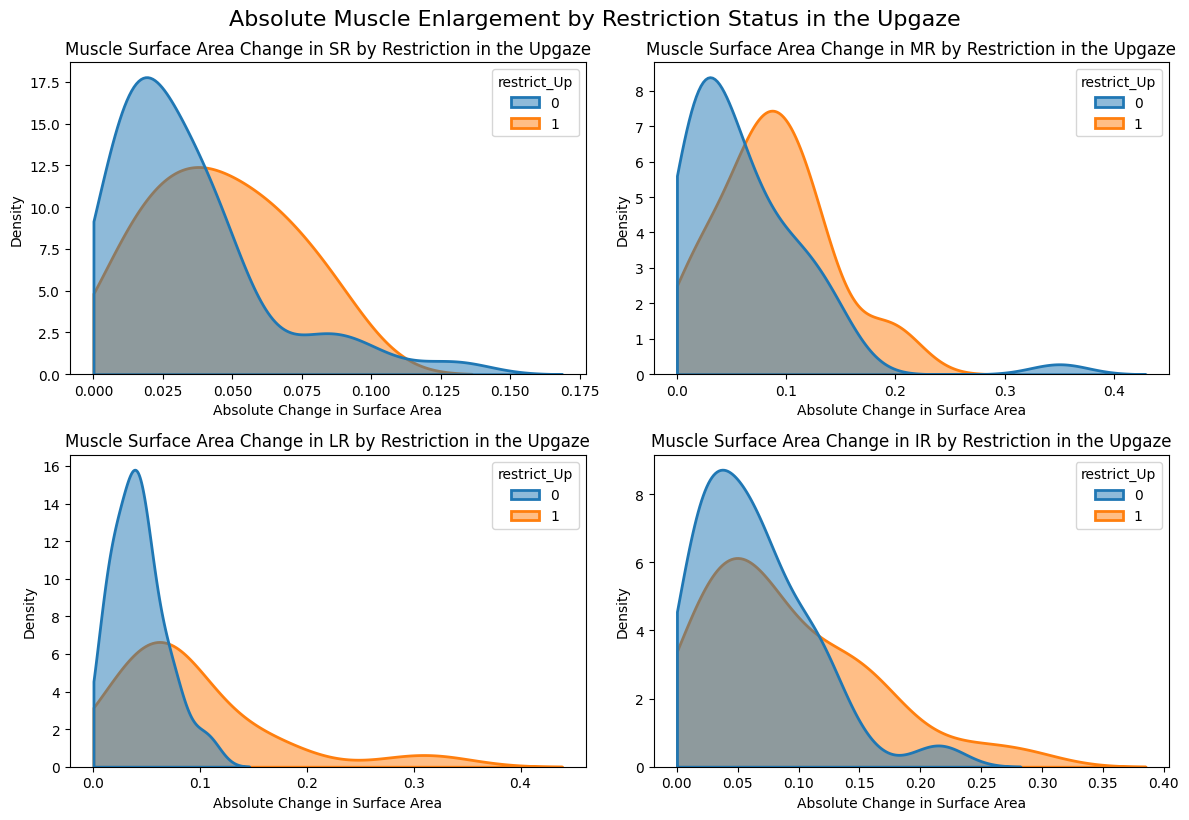

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define muscle names for looping
muscles = ['abs_SR', 'abs_MR', 'abs_LR', 'abs_IR']

# Create a 2x2 grid of KDE plots
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=False)

for ax, muscle in zip(axes.flatten(), muscles):
    data = df_en[df_en[muscle] > 0]
    sns.kdeplot(data=data, x=muscle, hue='restrict_Up', fill=True,
                common_norm=False, alpha=0.5, linewidth=2, ax=ax, clip= (0, np.max(data)))
    ax.set_title(f'Muscle Surface Area Change in {muscle.split("_")[1]} by Restriction in the Upgaze')
    ax.set_xlabel('Absolute Change in Surface Area')
    ax.set_ylabel('Density')

# Improve spacing
plt.tight_layout()
plt.suptitle('Absolute Muscle Enlargement by Restriction Status in the Upgaze', fontsize=16, y=1.02)
plt.show()



In [40]:
from scipy.stats import mannwhitneyu

muscle = ['abs_SR', 'abs_MR', 'abs_LR', 'abs_IR']

for i in muscle:
    restricted = df_en[(df_en['restrict_Up'] == 1) & (df_en[i] > 0)][i] 
    unrestricted = df_en[(df_en['restrict_Up'] == 0) & (df_en[i] > 0)][i]
    test = mannwhitneyu(restricted, unrestricted, alternative='two-sided')

    print(f'Mann Whitney-U Test for {i}')
    if test.pvalue < alpha:
        print(f'p-value: {test.pvalue}')
        print(f'Reject the null hypothesis.')
        print('There is a significant difference between the percentage change in muscle surface area \nbetween patients with motility restriction in the Upgaze and patients without motility restriction in the Upgaze.')

    else:
        print(f'p-value: {test.pvalue}')
        print(f'Fail to reject the null hypothesis.')
        print('There is no significant difference between the percentage change in muscle surface area \nbetween patients with motility restriction in the Upgaze and patients without motility restriction in the Upgaze.')

    print('\n')


Mann Whitney-U Test for abs_SR
p-value: 0.11420213693177093
Fail to reject the null hypothesis.
There is no significant difference between the percentage change in muscle surface area 
between patients with motility restriction in the Upgaze and patients without motility restriction in the Upgaze.


Mann Whitney-U Test for abs_MR
p-value: 0.01893444587086218
Fail to reject the null hypothesis.
There is no significant difference between the percentage change in muscle surface area 
between patients with motility restriction in the Upgaze and patients without motility restriction in the Upgaze.


Mann Whitney-U Test for abs_LR
p-value: 0.0033072155576550567
Fail to reject the null hypothesis.
There is no significant difference between the percentage change in muscle surface area 
between patients with motility restriction in the Upgaze and patients without motility restriction in the Upgaze.


Mann Whitney-U Test for abs_IR
p-value: 0.12405316261909627
Fail to reject the null hypothesis.

/Users/peiyuanlee/miniforge3/envs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/peiyuanlee/miniforge3/envs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/peiyuanlee/miniforge3/envs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/peiyuanlee/miniforge3/e

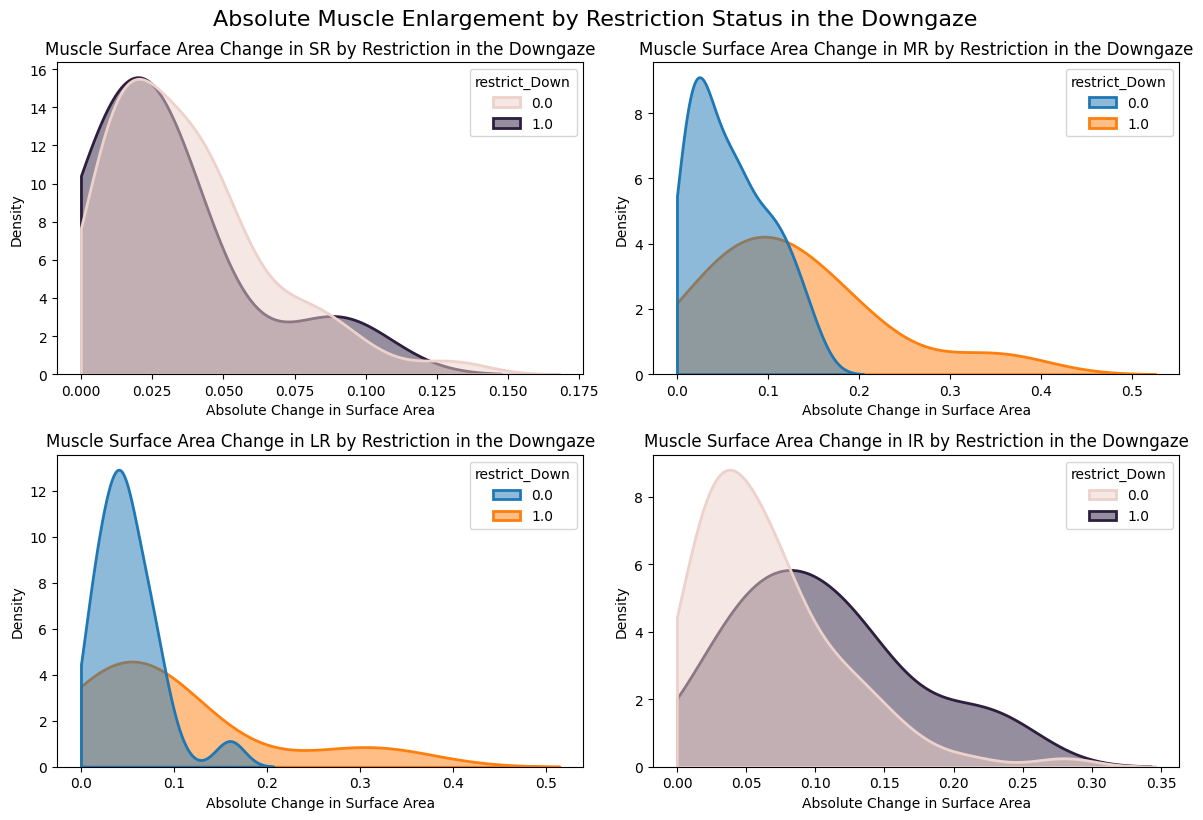

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define muscle names for looping
muscles = ['abs_SR', 'abs_MR', 'abs_LR', 'abs_IR']

# Create a 2x2 grid of KDE plots
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=False)

for ax, muscle in zip(axes.flatten(), muscles):
    data = df_en[df_en[muscle] > 0]
    sns.kdeplot(data=data, x=muscle, hue='restrict_Down', fill=True,
                common_norm=False, alpha=0.5, linewidth=2, ax=ax, clip= (0, np.max(data)))
    ax.set_title(f'Muscle Surface Area Change in {muscle.split("_")[1]} by Restriction in the Downgaze')
    ax.set_xlabel('Absolute Change in Surface Area')
    ax.set_ylabel('Density')

# Improve spacing
plt.tight_layout()
plt.suptitle('Absolute Muscle Enlargement by Restriction Status in the Downgaze', fontsize=16, y=1.02)
plt.show()



In [42]:
import numpy as np
from scipy.stats import shapiro

muscle = ['abs_SR', 'abs_MR', 'abs_LR', 'abs_IR']

for i in muscle:
    shapiro_test_restrict = shapiro(df_en[df_en['restrict_Down'] == 1][i])
    shapiro_test = shapiro(df_en[df_en['restrict_Down'] == 0][i])

    print(f'Shapiro-Wilk Test for {i}')
    if shapiro_test.pvalue < alpha or shapiro_test_restrict.pvalue <alpha:
        print(f'p-value for Non-Restricted Group: {shapiro_test.pvalue}')
        print(f'p-value for Restricted Group: {shapiro_test_restrict.pvalue}')
        print(f'Reject the null hypothesis. The distribution of {i} is not normal.')
    else:
        print(f'Fail to reject the null hypothesis. The distribution of {i} is normal.')

    print('\n')

Shapiro-Wilk Test for abs_SR
Fail to reject the null hypothesis. The distribution of abs_SR is normal.


Shapiro-Wilk Test for abs_MR
Fail to reject the null hypothesis. The distribution of abs_MR is normal.


Shapiro-Wilk Test for abs_LR
Fail to reject the null hypothesis. The distribution of abs_LR is normal.


Shapiro-Wilk Test for abs_IR
Fail to reject the null hypothesis. The distribution of abs_IR is normal.




In [43]:
from scipy.stats import mannwhitneyu

muscle = ['abs_SR', 'abs_MR', 'abs_LR', 'abs_IR']

for i in muscle:
    restricted = df_en[(df_en['restrict_Down'] == 1) & (df_en[i] > 0)][i] 
    unrestricted = df_en[(df_en['restrict_Down'] == 0) & (df_en[i] > 0)][i]
    test = mannwhitneyu(restricted, unrestricted, alternative='two-sided')

    print(f'Mann Whitney-U Test for {i}')
    if test.pvalue < alpha:
        print(f'p-value: {test.pvalue}')
        print(f'Reject the null hypothesis.')
        print('There is a significant difference between the percentage change in muscle surface area \nbetween patients with motility restriction in the Downgaze and patients without motility restriction in the Downgaze.')
    else:
        print(f'p-value: {test.pvalue}')
        print(f'Fail to reject the null hypothesis.')
        print('There is no significant difference between the percentage change in muscle surface area \nbetween patients with motility restriction in the Downgaze and patients without motility restriction in the Downgaze.')

    print('\n')


Mann Whitney-U Test for abs_SR
p-value: 0.2586811514855196
Fail to reject the null hypothesis.
There is no significant difference between the percentage change in muscle surface area 
between patients with motility restriction in the Downgaze and patients without motility restriction in the Downgaze.


Mann Whitney-U Test for abs_MR
p-value: 0.011217020353296692
Fail to reject the null hypothesis.
There is no significant difference between the percentage change in muscle surface area 
between patients with motility restriction in the Downgaze and patients without motility restriction in the Downgaze.


Mann Whitney-U Test for abs_LR
p-value: 0.22600741241234612
Fail to reject the null hypothesis.
There is no significant difference between the percentage change in muscle surface area 
between patients with motility restriction in the Downgaze and patients without motility restriction in the Downgaze.


Mann Whitney-U Test for abs_IR
p-value: 0.018615070289110285
Fail to reject the null 

/Users/peiyuanlee/miniforge3/envs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/peiyuanlee/miniforge3/envs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/peiyuanlee/miniforge3/envs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/peiyuanlee/miniforge3/e

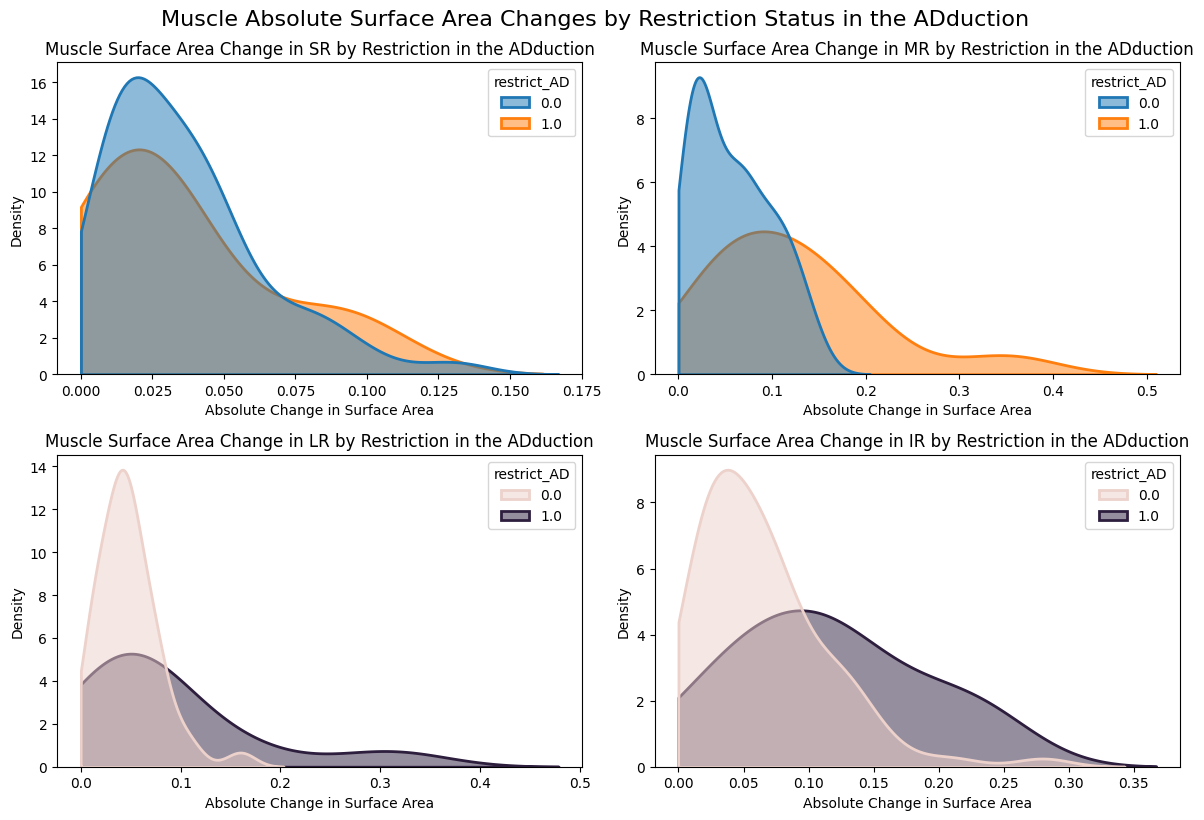

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define muscle names for looping
muscles = ['abs_SR', 'abs_MR', 'abs_LR', 'abs_IR']

# Create a 2x2 grid of KDE plots
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=False)

for ax, muscle in zip(axes.flatten(), muscles):
    data = df_en[df_en[muscle] > 0]
    sns.kdeplot(data=data, x=muscle, hue='restrict_AD', fill=True,
                common_norm=False, alpha=0.5, linewidth=2, ax=ax, clip= (0, np.max(data)))
    ax.set_title(f'Muscle Surface Area Change in {muscle.split("_")[1]} by Restriction in the ADduction')
    ax.set_xlabel('Absolute Change in Surface Area')
    ax.set_ylabel('Density')

# Improve spacing
plt.tight_layout()
plt.suptitle('Muscle Absolute Surface Area Changes by Restriction Status in the ADduction', fontsize=16, y=1.02)
plt.show()



In [69]:
import numpy as np
from scipy.stats import shapiro

muscle = ['abs_SR', 'abs_MR', 'abs_LR', 'abs_IR']

for i in muscle:
    shapiro_test_restrict = shapiro(df_en[(df_en['restrict_AD'] == 1) & (df_en[i] > 0)][i])
    shapiro_test = shapiro(df_en[(df_en['restrict_AD'] == 0) & (df_en[i] > 0)][i])

    print(f'Shapiro-Wilk Test for {i}')
    if shapiro_test.pvalue < alpha or shapiro_test_restrict.pvalue <alpha:
        print(f'p-value for Non-Restricted Group: {shapiro_test.pvalue}')
        print(f'p-value for Restricted Group: {shapiro_test_restrict.pvalue}')
        print(f'Reject the null hypothesis. The distribution of {i} is not normal.')
    else:
        print(f'Fail to reject the null hypothesis. The distribution of {i} is normal.')

    print('\n')

Shapiro-Wilk Test for abs_SR
p-value for Non-Restricted Group: 1.4942979760235175e-05
p-value for Restricted Group: 0.05367584526538849
Reject the null hypothesis. The distribution of abs_SR is not normal.


Shapiro-Wilk Test for abs_MR
p-value for Non-Restricted Group: 0.00022393063409253955
p-value for Restricted Group: 0.0849810391664505
Reject the null hypothesis. The distribution of abs_MR is not normal.


Shapiro-Wilk Test for abs_LR
p-value for Non-Restricted Group: 0.0007084052776917815
p-value for Restricted Group: 0.002876927610486746
Reject the null hypothesis. The distribution of abs_LR is not normal.


Shapiro-Wilk Test for abs_IR
p-value for Non-Restricted Group: 9.434697290089389e-07
p-value for Restricted Group: 0.6923128366470337
Reject the null hypothesis. The distribution of abs_IR is not normal.




In [70]:
from scipy.stats import mannwhitneyu

muscle = ['abs_SR', 'abs_MR', 'abs_LR', 'abs_IR']

for i in muscle:
    restricted = df_en[(df_en['restrict_AD'] == 1) & (df_en[i] > 0)][i] 
    unrestricted = df_en[(df_en['restrict_AD'] == 0) & (df_en[i] > 0)][i]
    test = mannwhitneyu(restricted, unrestricted, alternative='two-sided')

    print(f'Mann Whitney-U Test for {i}')
    if test.pvalue < alpha:
        print(f'p-value: {test.pvalue}')
        print(f'Reject the null hypothesis.')
        print('There is a ignificant difference between the percentage change in muscle surface area \nbetween patients with motility restriction in the ADduction and patients without motility restriction in the ADduction.')
    else:
        print(f'p-value: {test.pvalue}')
        print(f'Fail to reject the null hypothesis.')
        print('There is no significant difference between the percentage change in muscle surface area \nbetween patients with motility restriction in the ADduction and patients without motility restriction in the ADduction.')

    print('\n')


Mann Whitney-U Test for abs_SR
p-value: 0.613362599966701
Fail to reject the null hypothesis.
There is no significant difference between the percentage change in muscle surface area 
between patients with motility restriction in the ADduction and patients without motility restriction in the ADduction.


Mann Whitney-U Test for abs_MR
p-value: 0.004821338581428693
Fail to reject the null hypothesis.
There is no significant difference between the percentage change in muscle surface area 
between patients with motility restriction in the ADduction and patients without motility restriction in the ADduction.


Mann Whitney-U Test for abs_LR
p-value: 0.23544113033377279
Fail to reject the null hypothesis.
There is no significant difference between the percentage change in muscle surface area 
between patients with motility restriction in the ADduction and patients without motility restriction in the ADduction.


Mann Whitney-U Test for abs_IR
p-value: 0.023124591017566986
Fail to reject the 

/Users/peiyuanlee/miniforge3/envs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/peiyuanlee/miniforge3/envs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/peiyuanlee/miniforge3/envs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/peiyuanlee/miniforge3/e

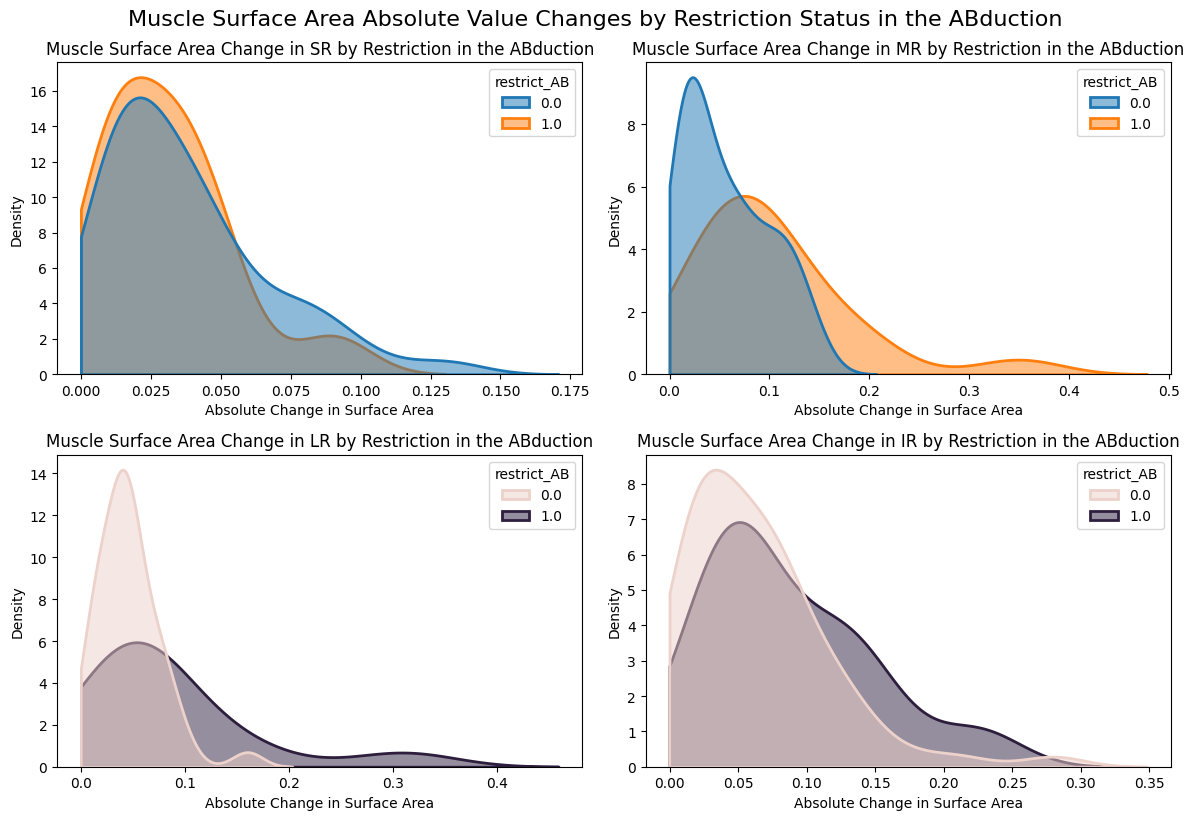

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define muscle names for looping
muscles = ['abs_SR', 'abs_MR', 'abs_LR', 'abs_IR']

# Create a 2x2 grid of KDE plots
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=False)

for ax, muscle in zip(axes.flatten(), muscles):
    data = df_en[df_en[muscle] > 0]
    sns.kdeplot(data=data, x=muscle, hue='restrict_AB', fill=True,
                common_norm=False, alpha=0.5, linewidth=2, ax=ax, clip= (0, np.max(data)))
    ax.set_title(f'Muscle Surface Area Change in {muscle.split("_")[1]} by Restriction in the ABduction')
    ax.set_xlabel('Absolute Change in Surface Area')
    ax.set_ylabel('Density')

# Improve spacing
plt.tight_layout()
plt.suptitle('Muscle Surface Area Absolute Value Changes by Restriction Status in the ABduction', fontsize=16, y=1.02)
plt.show()



In [76]:
import numpy as np
from scipy.stats import shapiro

muscle = ['abs_SR', 'abs_MR', 'abs_LR', 'abs_IR']

for i in muscle:
    shapiro_test_restrict = shapiro(df_en[(df_en['restrict_AB'] == 1) & (df_en[i] > 0)][i])
    shapiro_test = shapiro(df_en[(df_en['restrict_AB'] == 0 & (df_en[i] > 0))][i])

    print(f'Shapiro-Wilk Test for {i}')
    if shapiro_test.pvalue < alpha or shapiro_test_restrict.pvalue < alpha:
        print(f'p-value for Non-Restricted Group: {shapiro_test.pvalue}')
        print(f'p-value for Restricted Group: {shapiro_test_restrict.pvalue}')
        print(f'Reject the null hypothesis. The distribution of {i} is not normal.')
    else:
        print(f'p-value for Non-Restricted Group: {shapiro_test.pvalue}')
        print(f'p-value for Restricted Group: {shapiro_test_restrict.pvalue}')
        print(f'Fail to reject the null hypothesis. The distribution of {i} is normal.')

    print('\n')

Shapiro-Wilk Test for abs_SR
p-value for Non-Restricted Group: 1.0
p-value for Restricted Group: 0.016156485304236412
Reject the null hypothesis. The distribution of abs_SR is not normal.


Shapiro-Wilk Test for abs_MR
p-value for Non-Restricted Group: 1.0
p-value for Restricted Group: 0.0033465195447206497
Reject the null hypothesis. The distribution of abs_MR is not normal.


Shapiro-Wilk Test for abs_LR
p-value for Non-Restricted Group: 1.0
p-value for Restricted Group: 0.0020172197837382555
Reject the null hypothesis. The distribution of abs_LR is not normal.


Shapiro-Wilk Test for abs_IR
p-value for Non-Restricted Group: 0.0006805463344790041
p-value for Restricted Group: 0.014061564579606056
Reject the null hypothesis. The distribution of abs_IR is not normal.




In [78]:
from scipy.stats import mannwhitneyu

muscle = ['abs_SR', 'abs_MR', 'abs_LR', 'abs_IR']

for i in muscle:
    restricted = df_en[(df_en['restrict_AB'] == 1) & (df_en[i] > 0)][i] 
    unrestricted = df_en[(df_en['restrict_AB'] == 0) & (df_en[i] > 0)][i]
    test = mannwhitneyu(restricted, unrestricted, alternative='two-sided')

    print(f'Mann Whitney-U Test for {i}')
    if test.pvalue < alpha:
        print(f'p-value: {test.pvalue}')
        print(f'Reject the null hypothesis.')
        print('There is a significant difference between the percentage change in muscle surface area \nbetween patients with motility restriction in the ABduction and patients without motility restriction in the ABduction.')
    else:
        print(f'p-value: {test.pvalue}')
        print(f'Fail to reject the null hypothesis.')
        print('There is no significant difference between the percentage change in muscle surface area \nbetween patients with motility restriction in the ABduction and patients without motility restriction in the ABduction.')

    print('\n')


Mann Whitney-U Test for abs_SR
p-value: 0.4996761965894939
Fail to reject the null hypothesis.
There is no significant difference between the percentage change in muscle surface area 
between patients with motility restriction in the ABduction and patients without motility restriction in the ABduction.


Mann Whitney-U Test for abs_MR
p-value: 0.009517495078731867
Fail to reject the null hypothesis.
There is no significant difference between the percentage change in muscle surface area 
between patients with motility restriction in the ABduction and patients without motility restriction in the ABduction.


Mann Whitney-U Test for abs_LR
p-value: 0.0798096608727745
Fail to reject the null hypothesis.
There is no significant difference between the percentage change in muscle surface area 
between patients with motility restriction in the ABduction and patients without motility restriction in the ABduction.


Mann Whitney-U Test for abs_IR
p-value: 0.06923694158779427
Fail to reject the n

# Chi Square test

In [50]:
import pandas as pd
from scipy.stats import chi2_contingency
data = df_en[df_en[muscle].notnull()]
contingency_table = pd.crosstab(df_en['muscle_bi'], df_en['Restriction'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("P-value:", p)
if p < 0.05:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')
print('\n')
    

Chi-square statistic: 11.859250387943195
P-value: 0.0005737563440323352
Reject the null hypothesis




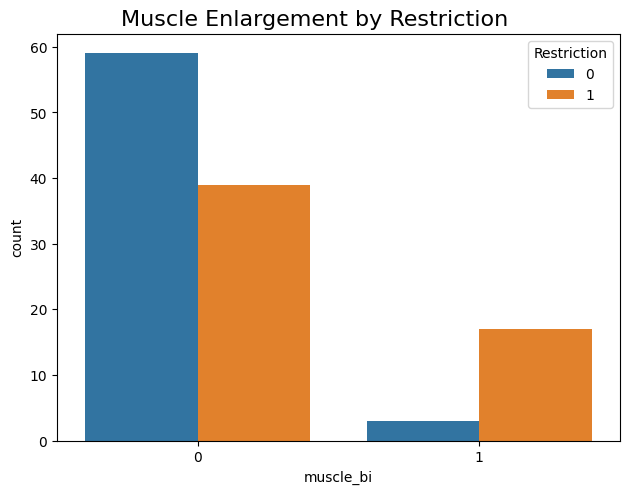

In [52]:
sns.countplot(data=df_en[df_en.notnull()], x='muscle_bi', hue='Restriction')
ax.set_title(f'Presence of Muscle Enlargement by Restriction')
ax.set_xlabel('Muscle Enlargement')
ax.set_ylabel('Density')

# Improve spacing
plt.tight_layout()
plt.suptitle('Muscle Enlargement by Restriction', fontsize=16, y=1.02)
plt.show()

# Fisher's Exact Test

In [53]:
alpha = 0.05/(4*3)

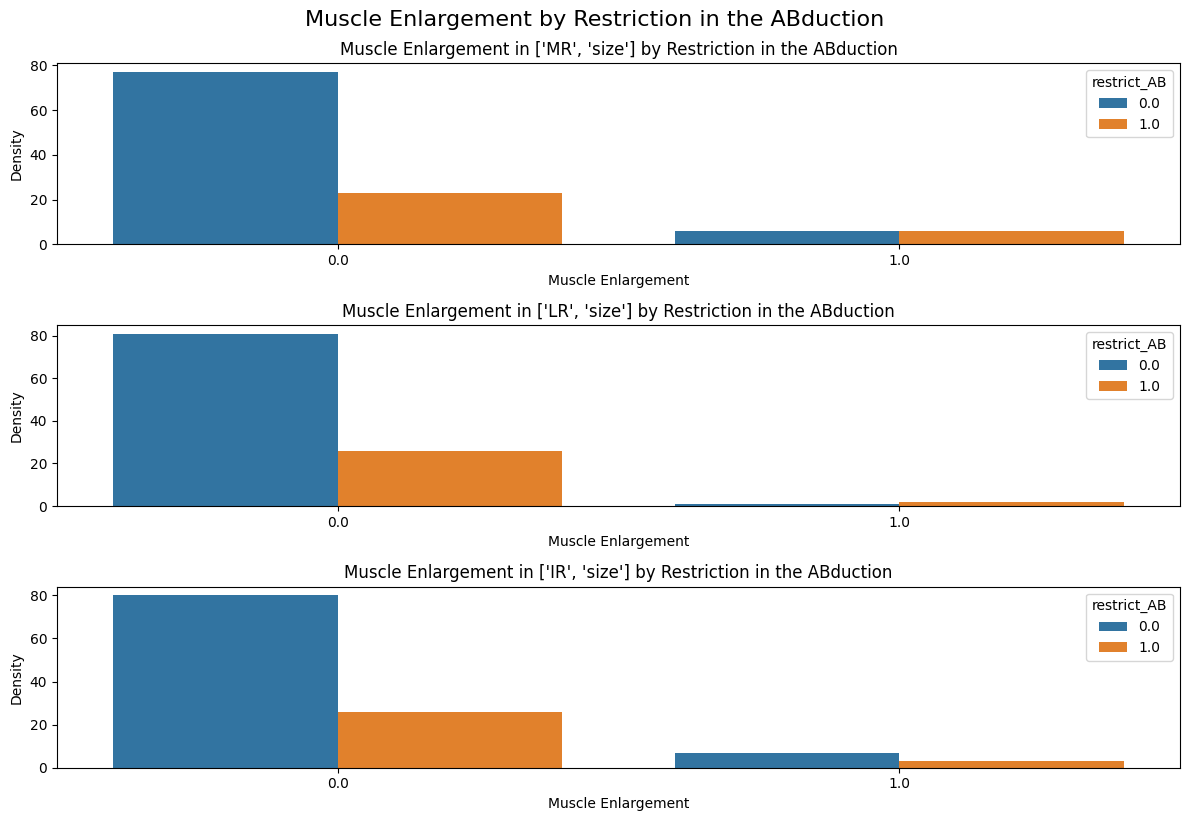

In [54]:
muscles = [ 'MR_size', 'LR_size', 'IR_size']

# Create a 2x2 grid of KDE plots
fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=False)

for ax, muscle in zip(axes.flatten(), muscles):
    sns.countplot(data=df_en[df_en[muscle].notnull()], x=muscle, hue='restrict_AB', ax = ax)
    ax.set_title(f'Muscle Enlargement in {muscle.split("_")} by Restriction in the ABduction')
    ax.set_xlabel('Muscle Enlargement')
    ax.set_ylabel('Density')

# Improve spacing
plt.tight_layout()
plt.suptitle('Muscle Enlargement by Restriction in the ABduction', fontsize=16, y=1.02)
plt.show()

In [55]:
from scipy.stats import fisher_exact
import pandas as pd

muscles = ['MR_size', 'LR_size', 'IR_size']

for muscle in muscles:
    print(f'Fishers Test for {muscle.split("_")[0]} and Restriction in the ABduction')
    data = df_en[df_en[muscle].notnull()]
    contingency_table = pd.crosstab(data[muscle], data['restrict_AB'])
    oddsratio, p = fisher_exact(contingency_table)
    print("P-value:", p)
    if p < alpha:
        print('Reject the null hypothesis')
    else:
        print('Fail to reject the null hypothesis')
    print('\n')
    

Fishers Test for MR and Restriction in the ABduction
P-value: 0.07479013676896341
Fail to reject the null hypothesis


Fishers Test for LR and Restriction in the ABduction
P-value: 0.15879899916597162
Fail to reject the null hypothesis


Fishers Test for IR and Restriction in the ABduction
P-value: 0.7091664080101487
Fail to reject the null hypothesis




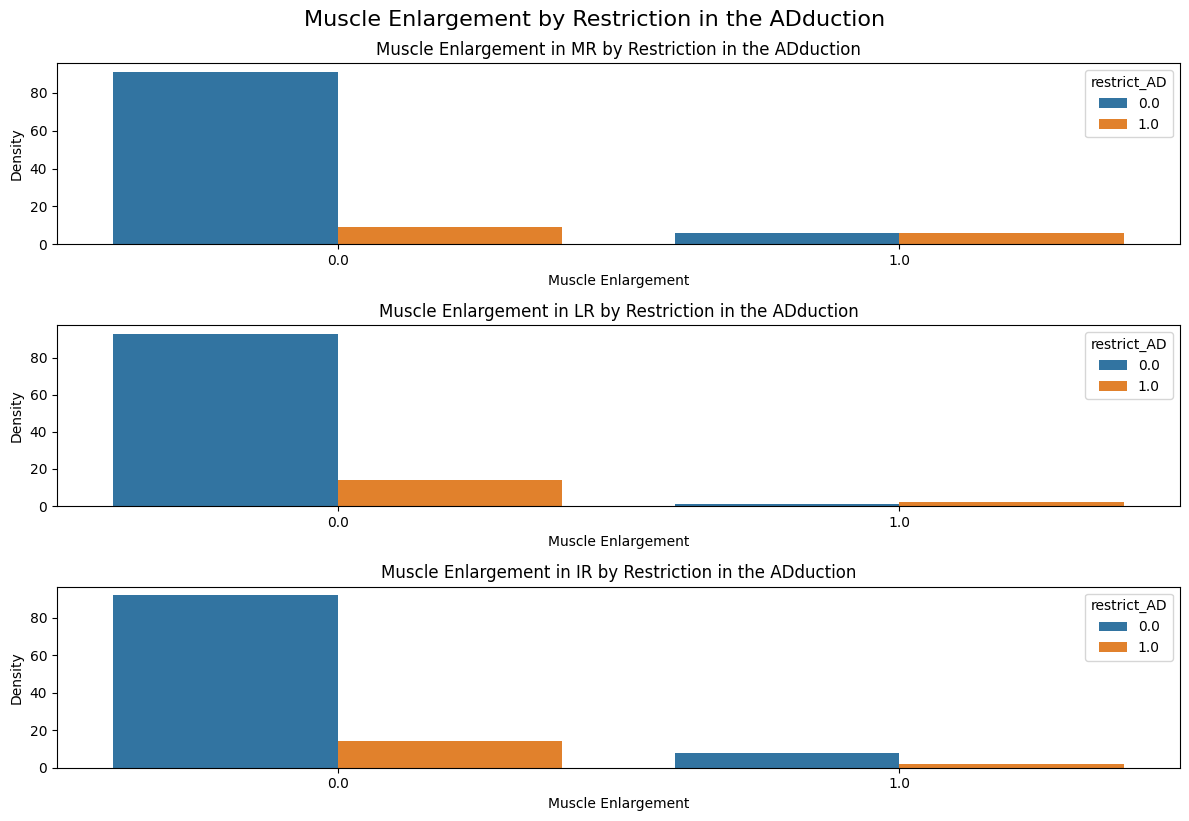

In [56]:
muscles = [ 'MR_size', 'LR_size', 'IR_size']

# Create a 2x2 grid of KDE plots
fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=False)

for ax, muscle in zip(axes.flatten(), muscles):
    sns.countplot(data=df_en[df_en[muscle].notnull()], x=muscle, hue='restrict_AD', ax = ax)
    ax.set_title(f'Muscle Enlargement in {muscle.split("_")[0]} by Restriction in the ADduction')
    ax.set_xlabel('Muscle Enlargement')
    ax.set_ylabel('Density')

# Improve spacing
plt.tight_layout()
plt.suptitle('Muscle Enlargement by Restriction in the ADduction', fontsize=16, y=1.02)
plt.show()

In [57]:
from scipy.stats import fisher_exact
import pandas as pd

muscles = ['MR_size', 'LR_size', 'IR_size']

for muscle in muscles:
    print(f'Fishers Test for {muscle.split("_")[0]} and Restriction in the ADduction')
    data = df_en[df_en[muscle].notnull()]
    contingency_table = pd.crosstab(data[muscle], data['restrict_AD'])
    oddsratio, p = fisher_exact(contingency_table)
    print("P-value:", p)
    if p < alpha:
        print('Reject the null hypothesis')
    else:
        print('Fail to reject the null hypothesis')
    print('\n')

Fishers Test for MR and Restriction in the ADduction
P-value: 0.0012188538233949085
Reject the null hypothesis


Fishers Test for LR and Restriction in the ADduction
P-value: 0.054860531924752105
Fail to reject the null hypothesis


Fishers Test for IR and Restriction in the ADduction
P-value: 0.6268876598736229
Fail to reject the null hypothesis




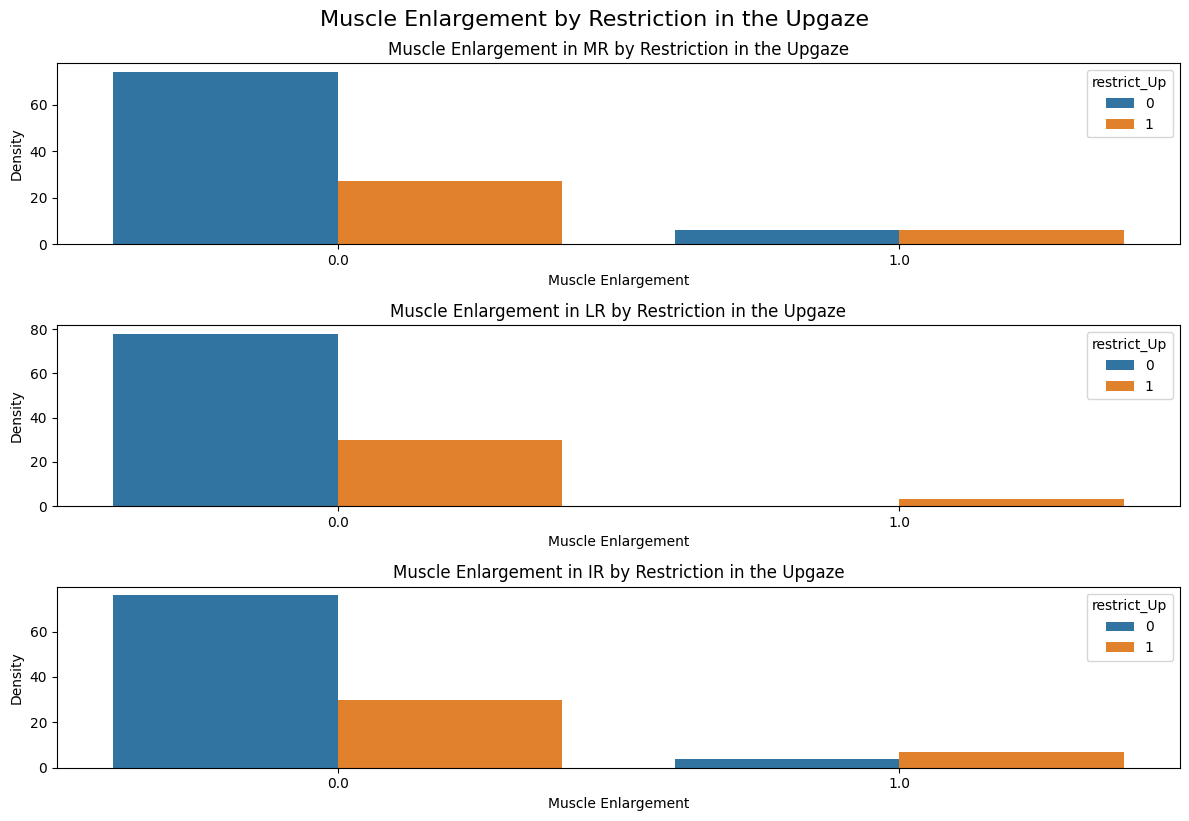

In [58]:
muscles = [ 'MR_size', 'LR_size', 'IR_size']

# Create a 2x2 grid of KDE plots
fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=False)

for ax, muscle in zip(axes.flatten(), muscles):
    sns.countplot(data=df_en[df_en[muscle].notnull()], x=muscle, hue='restrict_Up', ax = ax)
    ax.set_title(f'Muscle Enlargement in {muscle.split("_")[0]} by Restriction in the Upgaze')
    ax.set_xlabel('Muscle Enlargement')
    ax.set_ylabel('Density')

# Improve spacing
plt.tight_layout()
plt.suptitle('Muscle Enlargement by Restriction in the Upgaze', fontsize=16, y=1.02)
plt.show()

In [59]:
from scipy.stats import fisher_exact
import pandas as pd

muscles = ['MR_size', 'LR_size', 'IR_size']

for muscle in muscles:
    print(f'Fishers Test for {muscle.split("_")[0]} and Restriction in the Upgaze')
    data = df_en[df_en[muscle].notnull()]
    contingency_table = pd.crosstab(data[muscle], data['restrict_Up'])
    oddsratio, p = fisher_exact(contingency_table)
    print("P-value:", p)
    if p < alpha:
        print('Reject the null hypothesis')
    else:
        print('Fail to reject the null hypothesis')
    print('\n')

Fishers Test for MR and Restriction in the Upgaze
P-value: 0.10547151659397375
Fail to reject the null hypothesis


Fishers Test for LR and Restriction in the Upgaze
P-value: 0.024597074138358543
Fail to reject the null hypothesis


Fishers Test for IR and Restriction in the Upgaze
P-value: 0.03498552596915635
Fail to reject the null hypothesis




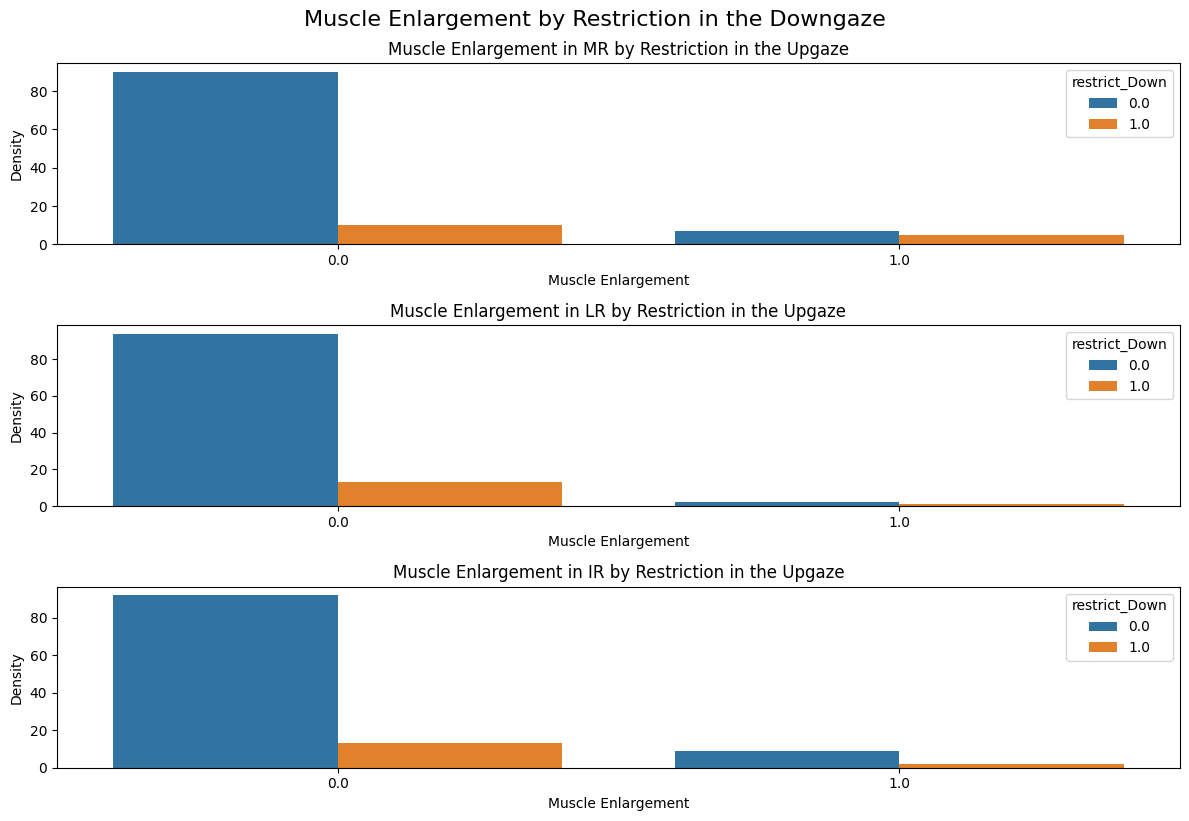

In [60]:
muscles = [ 'MR_size', 'LR_size', 'IR_size']

# Create a 2x2 grid of KDE plots
fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=False)

for ax, muscle in zip(axes.flatten(), muscles):
    sns.countplot(data=df_en[df_en[muscle].notnull()], x=muscle, hue='restrict_Down', ax = ax)
    ax.set_title(f'Muscle Enlargement in {muscle.split("_")[0]} by Restriction in the Upgaze')
    ax.set_xlabel('Muscle Enlargement')
    ax.set_ylabel('Density')

# Improve spacing
plt.tight_layout()
plt.suptitle('Muscle Enlargement by Restriction in the Downgaze', fontsize=16, y=1.02)
plt.show()

In [61]:
from scipy.stats import fisher_exact
import pandas as pd

muscles = ['MR_size', 'LR_size', 'IR_size']

for muscle in muscles:
    print(f'Fishers Test for {muscle.split("_")[0]} and Restriction in the Downgaze')
    data = df_en[df_en[muscle].notnull()]
    contingency_table = pd.crosstab(data[muscle], data['restrict_Down'])
    oddsratio, p = fisher_exact(contingency_table)
    print("P-value:", p)
    if p < alpha:
        print('Reject the null hypothesis')
    else:
        print('Fail to reject the null hypothesis')
    print('\n')

Fishers Test for MR and Restriction in the Downgaze
P-value: 0.00995285734388093
Fail to reject the null hypothesis


Fishers Test for LR and Restriction in the Downgaze
P-value: 0.3379668242053564
Fail to reject the null hypothesis


Fishers Test for IR and Restriction in the Downgaze
P-value: 0.633377526638793
Fail to reject the null hypothesis


